<a href="https://colab.research.google.com/github/Ezequiel-del/Parciales_de_IA_2-2024/blob/main/PrimerParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset para parcilaes /train.csv')


# Verificar la cantidad de valores faltantes por columna
faltantes = df.isnull().sum()

# Mostrar las columnas que tienen valores faltantes
print(faltantes)

df.info()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64

In [34]:
# Crear la columna 'Has5G' basada en la columna 'price_range'
df['Has5G'] = df['price_range'].apply(lambda x: True if x in [2, 3] else False)

# Crear la columna 'OperatingSystem' basada en la columna 'price_range'
def assign_os(price_range):
    if price_range == 3:  # Costo muy alto - iOS
        return 'iOS'
    elif price_range == 2:  # Costo alto - mezcla de iOS y Android
        return np.random.choice(['iOS', 'Android'], p=[0.7, 0.3])  # 70% iOS, 30% Android
    else:  # Costo bajo y medio - Android o Windows
        return np.random.choice(['Android', 'Windows'])

df['OperatingSystem'] = df['price_range'].apply(assign_os)

# Mostrar las primeras filas del dataset modificado
print(df.head())

# Guardar el dataset modificado
df.to_csv('train_modified.csv', index=False)

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9     7         19        0   
1        136        3  ...  2631    17     3          7        1   
2        145        5  ...  2603    11     2          9        1   
3        131        6  ...  2769    16     8         11        1   
4        141        2  ...  1411     8     2         15        1   

   touch_screen  wifi  price_range  Has5G  OperatingSystem  
0             0     1            1  False        

In [35]:
# Convertir la columna Has5G a enteros (0 o 1)
df['Has5G'] = df['Has5G'].astype(int)

# Convertir la columna OperatingSystem a números (puedes asignar valores numéricos a cada sistema operativo)
df['OperatingSystem'] = df['OperatingSystem'].map({'Android': 1, 'iOS': 2, 'Windows': 3})

# Verificar los tipos de datos después de la conversión
print(df.dtypes)
print(df.info)

battery_power        int64
blue                 int64
clock_speed        float64
dual_sim             int64
fc                   int64
four_g               int64
int_memory           int64
m_dep              float64
mobile_wt            int64
n_cores              int64
pc                   int64
px_height            int64
px_width             int64
ram                  int64
sc_h                 int64
sc_w                 int64
talk_time            int64
three_g              int64
touch_screen         int64
wifi                 int64
price_range          int64
Has5G                int64
OperatingSystem      int64
dtype: object
<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1    

In [38]:
import pandas as pd
import numpy as np

# Función para crear variaciones significativas en los datos
def variar_significativamente(fila):
    # Cambiar numéricos con una variación más grande, garantizando que no sean negativos
    fila['ram'] = max(0, fila['ram'] + np.random.randint(-1024, 1024))  # Variación de hasta 1GB
    fila['battery_power'] = max(0, fila['battery_power'] + np.random.randint(-500, 500))  # Variación significativa de la batería
    fila['px_height'] = max(0, fila['px_height'] + np.random.randint(-500, 500))  # Variación en la altura de píxeles
    fila['px_width'] = max(0, fila['px_width'] + np.random.randint(-500, 500))  # Variación en el ancho de píxeles
    fila['int_memory'] = max(0, fila['int_memory'] + np.random.randint(-32, 32))  # Variación en memoria interna

    # Cambiar características categóricas
    fila['Has5G'] = 1 - fila['Has5G']  # Invertir si tiene 5G
    fila['OperatingSystem'] = np.random.choice([1, 2, 3])  # Asignar un nuevo sistema operativo aleatorio

    return fila

# Duplicar todo el dataset aplicando variaciones significativas
duplicados = []

for i in range(len(df)):
    fila_original = df.iloc[i].copy()  # Copiar la fila original
    fila_duplicada = variar_significativamente(fila_original)  # Variar significativamente la fila duplicada
    duplicados.append(fila_duplicada)  # Agregar la fila duplicada a la lista

# Convertir la lista de duplicados a un DataFrame
duplicados_df = pd.DataFrame(duplicados)

# Combinar el dataset original con los duplicados
df_final = pd.concat([df, duplicados_df], ignore_index=True)

# Ver las primeras filas del nuevo dataset con duplicados
print(df_final.head())



   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...     ram  sc_h  sc_w  talk_time  three_g  \
0    0.6      188.0      2.0  ...  2549.0   9.0   7.0       19.0      0.0   
1    0.7      136.0      3.0  ...  2631.0  17.0   3.0        7.0      1.0   
2    0.9      145.0      5.0  ...  2603.0  11.0   2.0        9.0      1.0   
3    0.8      131.0      6.0  ...  2769.0  16.0   8.0       11.0      1.0   
4    0.6      141.0      2.0  ...  1411.0   8.0   2.0       15.0      1.0   

   touch_screen  wifi  price_range  Has5G  OperatingSystem  
0           0.0   1.0    

In [39]:
# Obtener el número de filas y columnas
num_filas, num_columnas = df_final.shape
print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")


Número de filas: 4000, Número de columnas: 23


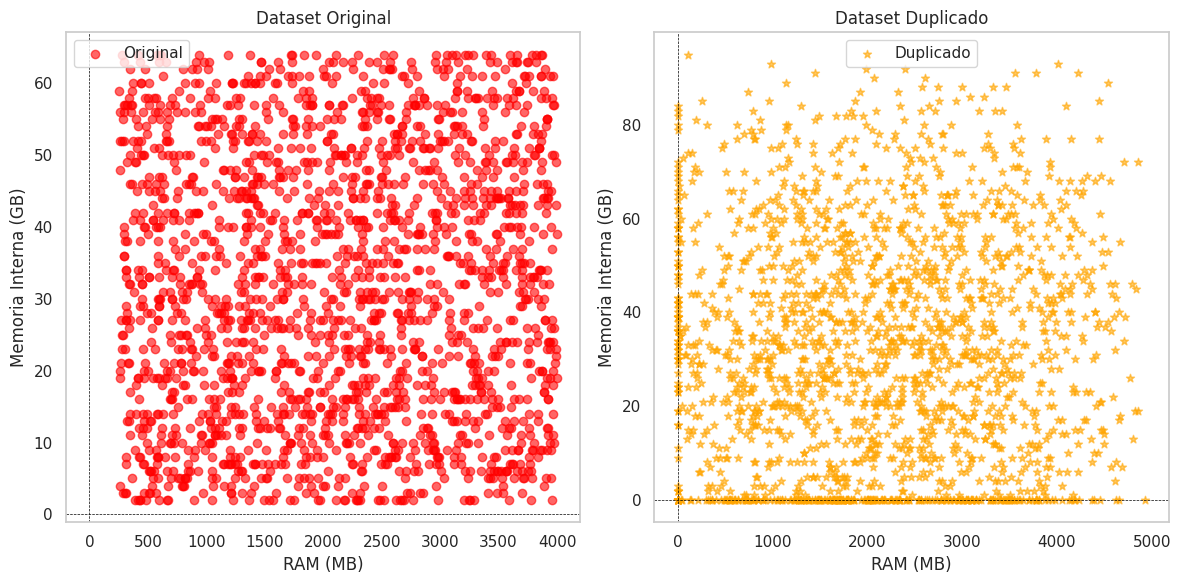

In [43]:

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para el dataset original (primeros 2000)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, gráfico 1
plt.scatter(df['ram'][:2000], df['int_memory'][:2000], color='red', label='Original', alpha=0.6, marker='o')
plt.title('Dataset Original')
plt.xlabel('RAM (MB)')
plt.ylabel('Memoria Interna (GB)')
plt.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Gráfico de dispersión para el dataset duplicado (desde 2001 a 4000)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, gráfico 2
plt.scatter(df_final['ram'][2000:4000], df_final['int_memory'][2000:4000], color='orange', label='Duplicado', alpha=0.6, marker='*')
plt.title('Dataset Duplicado')
plt.xlabel('RAM (MB)')
plt.ylabel('Memoria Interna (GB)')
plt.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


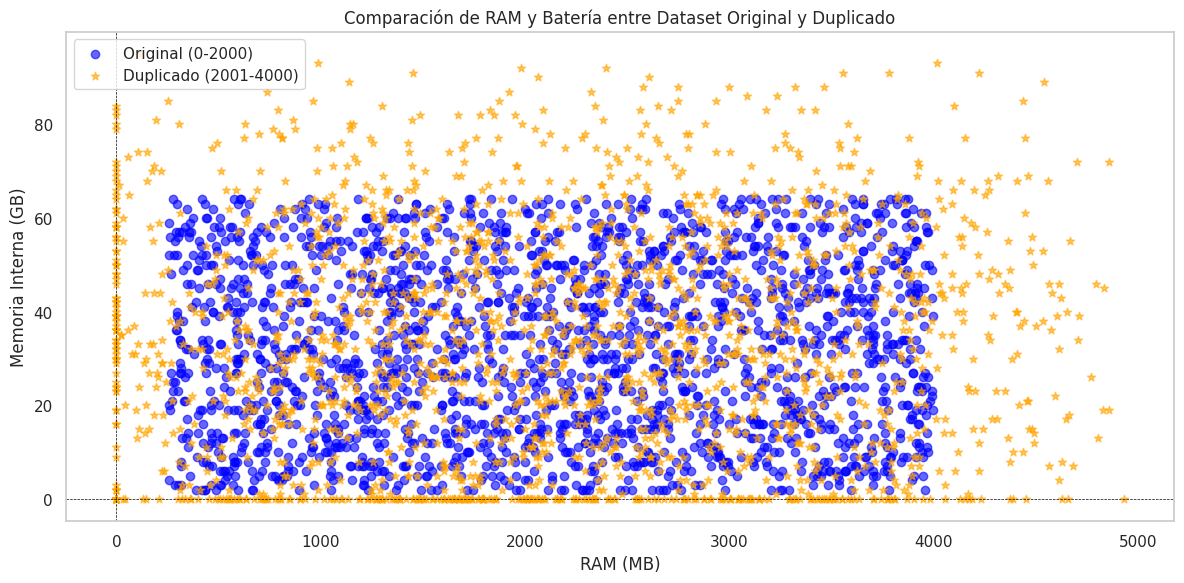

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para el dataset original (primeros 2000 ejemplos)
plt.scatter(df['ram'][:2000], df['int_memory'][:2000], color='blue', label='Original (0-2000)', alpha=0.6, marker='o')

# Gráfico de dispersión para el dataset duplicado (ejemplos 2001-4000)
plt.scatter(df_final['ram'][2000:4000], df_final['int_memory'][2000:4000], color='orange', label='Duplicado (2001-4000)', alpha=0.6, marker='*')

# Añadir líneas de referencia
plt.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.5, linestyle='--')

# Configurar el título y las etiquetas
plt.title('Comparación de RAM y Batería entre Dataset Original y Duplicado')
plt.xlabel('RAM (MB)')
plt.ylabel('Memoria Interna (GB)')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:


# Mostrar los primeros 10 datos del dataset original (índices 0-9)
print("Primeros 10 datos del Dataset Original (índices 0-9):")
print(df.head(10))

# Mostrar los primeros 10 datos del dataset duplicado (índices 2000-2009)
print("\nPrimeros 10 datos del Dataset Duplicado (índices 2000-2009):")
print(df_final.iloc[2000:2010])


Primeros 10 datos del Dataset Original (índices 0-9):
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g 

In [45]:
import numpy as np

# Seleccionar los datos sintéticos del df_final (entre 2000 y 4000)
X_sintetico = df_final.iloc[2000:4000].drop('price_range', axis=1).values  # Características
y_sintetico = df_final.iloc[2000:4000]['price_range'].values  # Etiquetas

# Función para dividir los datos en entrenamiento y prueba
def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sintetico, y_sintetico)
